<a href="https://colab.research.google.com/github/pranitha-pedapudi/ML_Workshop/blob/main/BOOTSTRAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* **CREATING A MODEL**
* **BOOTSTRAP**

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv("/input.csv")
dataset

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


In [ ]:
data.head()

,boot_size,harness_size
45,41,57
46,39,58
47,39,57
48,35,51
49,39,59


In [ ]:
dataset.head()

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
formula="boot_size ~ harness_size"#We try to explain the boot_size through the harness size and not vice-versa

In [ ]:
model=smf.ols(formula=formula, data=dataset)
#The result of this statement is a regression model (model) that has been fit to the provided data using Ordinary Least Squares.
#You can then use this model to make predictions, analyze coefficients, and perform other tasks related to regression analysis.

In [ ]:
if not hasattr(model,'params'):
  print("Model is selected but it doesnt have parameters set. We need to train it!")
#hasattr checks whether the model has parameters or not.

Model is selected but it doesnt have parameters set. We need to train it!


In [ ]:
#residual errors is the difference between the actual value to the predicted value error=y'-y
#ols model has 2 parameters slope and intercept

In [ ]:
#now we train the model

In [ ]:
fitted_model=model.fit()

In [ ]:
print("The following parameters have been found:\n"+
      f"Line Slope: {fitted_model.params[1]}\n"+
      f"Line Intercept: {fitted_model.params[0]}")

The following parameters have been found:
Line Slope: 0.585925416738271
Line Intercept: 5.71910981268259


In [ ]:
harness_size={'harness_size': [52.5]}
approximate_bootsize=fitted_model.predict(harness_size)
print(approximate_bootsize)

0    36.480194
dtype: float64


In [ ]:
harness_size={'harness_size': [58]}
approximate_bootsize=fitted_model.predict(harness_size)
print(approximate_bootsize)

0    39.702784
dtype: float64


In [ ]:
approximate_size=fitted_model.predict(dataset['harness_size'])

In [ ]:
import matplotlib.pyplot as plt

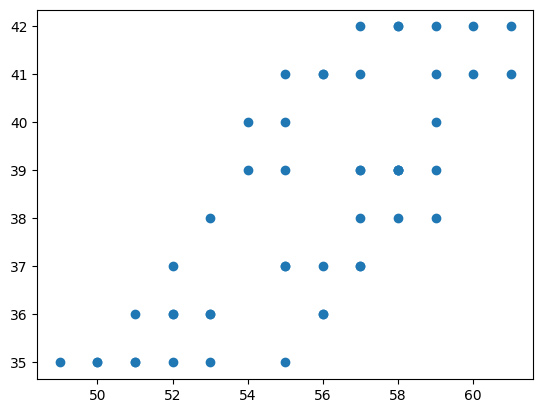

In [ ]:
plt.scatter(dataset['harness_size'],dataset['boot_size'])

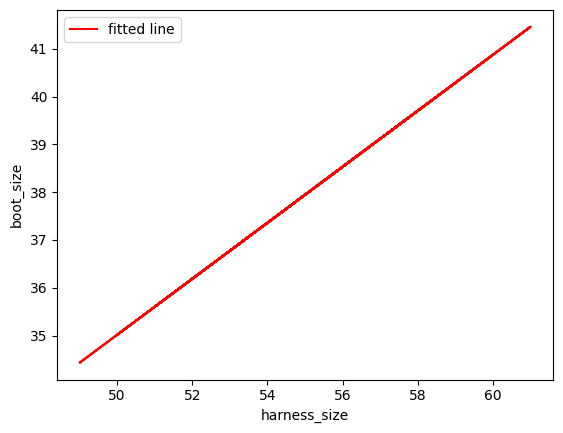

In [ ]:
plt.plot(dataset['harness_size'], fitted_model.params[1]*dataset['harness_size']+ fitted_model.params[0],'r',label="fitted line")
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend( )

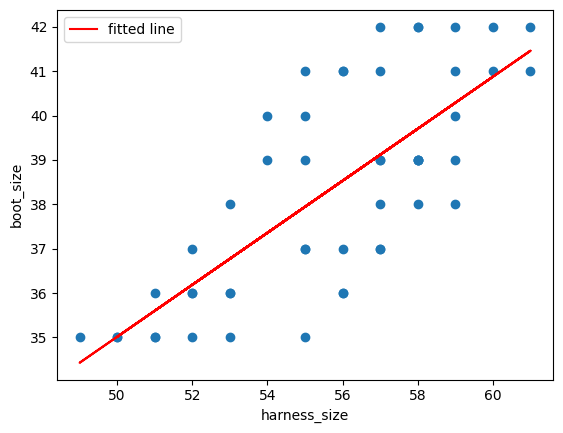

In [ ]:
plt.scatter(dataset['harness_size'],dataset['boot_size'])
plt.plot(dataset['harness_size'], fitted_model.params[1]*dataset['harness_size']+ fitted_model.params[0],'r',label="fitted line")
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
x=dataset["harness_size"]
y=dataset["boot_size"]
approximate_bootsize=fitted_model.predict(x)
print(approximate_bootsize)

0     39.702784
1     39.702784
2     36.187231
3     39.702784
4     39.116859
5     36.187231
6     37.945008
7     36.773157
8     34.429455
9     37.359082
10    40.288709
11    38.530933
12    36.773157
13    39.702784
14    39.116859
15    39.702784
16    38.530933
17    35.601306
18    35.015381
19    40.288709
20    40.288709
21    40.288709
22    37.945008
23    35.015381
24    37.945008
25    36.187231
26    36.773157
27    37.359082
28    41.460560
29    38.530933
30    37.945008
31    40.874635
32    39.116859
33    38.530933
34    41.460560
35    39.702784
36    36.773157
37    39.116859
38    39.116859
39    37.945008
40    40.874635
41    35.601306
42    36.187231
43    38.530933
44    37.945008
45    39.116859
46    39.702784
47    39.116859
48    35.601306
49    40.288709
dtype: float64


In [ ]:
rmse=np.sqrt(metrics.mean_squared_error(y, approximate_bootsize))
print('RMSE:',rmse)

RMSE: 1.5560397381202649


In [ ]:
mse = metrics.mean_squared_error(y, approximate_bootsize)
print('MSE:', mse)

MSE: 2.4212596666093824


In [ ]:
print("R-squared",metrics.r2_score(y,approximate_bootsize))

R-squared 0.5689868152575153


In [ ]:
print("Average cost: ",y.mean)

Average cost:  <bound method NDFrame._add_numeric_operations.<locals>.mean of 0     39
1     38
2     37
3     39
4     38
5     35
6     37
7     36
8     35
9     40
10    40
11    36
12    38
13    39
14    42
15    42
16    36
17    36
18    35
19    41
20    42
21    38
22    37
23    35
24    40
25    36
26    35
27    39
28    41
29    37
30    35
31    41
32    39
33    41
34    42
35    42
36    36
37    37
38    37
39    39
40    42
41    35
42    36
43    41
44    41
45    41
46    39
47    39
48    35
49    39
Name: boot_size, dtype: int64>
